## Example decoding GFW loss and tree cover tiles

The current assets produced by Google are accessible at: 
'http://earthengine.google.org/static/hansen_2014/gfw_loss_tree_year_{threshold}_2014{/z}{/x}{/y}.png'
These contain Hansen UMD data from 2014.


In [2]:
import requests
import math
import maya
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

The data returned from the url are RGBA png web map tiles. To break down the contents of these tiles we can do a little exploration.

First, we are going to identify a web map tile at zoom 9 which contains a distinctive area, easy to identify. I have selected La Palma (Canary Islands). This can be done via the decimal lat long and the handy math [here](http://wiki.openstreetmap.org/wiki/Slippy_map_tilenames#Lon..2Flat._to_tile_numbers).

In [8]:
# 9 zoom  lat 28.62   lon -17.84 of La Palma

def deg2num(lat_deg, lon_deg, zoom):
    lat_rad = math.radians(lat_deg)
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
    return (xtile, ytile)

deg2num(28.62, -17.84, 9)


(230, 213)

so tile 9/230/213 should contain La Palma...

In [9]:
tile_url = "http://earthengine.google.org/static/hansen_2014/gfw_loss_tree_year_30_2014/9/230/213.png"
im_arrays = misc.imread(requests.get(tile_url, stream=True).raw, mode='RGBA')

BAND 0 (R): max=136, min=0


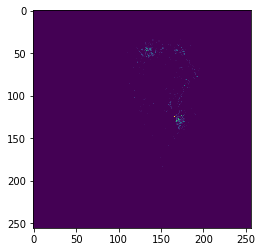

BAND 1 (G): max=255, min=0


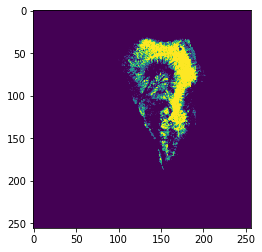

BAND 2 (B): max=13, min=0


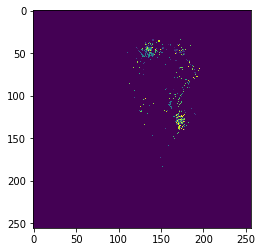

BAND 3 (α): max=255, min=255


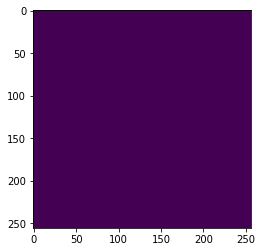

In [10]:
bands = {0:'R', 1:'G',2:'B',3:'α'}
for band in range(0,4):
    print(f"BAND {band} ({bands[band]}): max={im_arrays[:,:,band].max()}, min={im_arrays[:,:,band].min()}")
    plt.imshow(im_arrays[:,:,band])
    plt.show()

We can see from this that the tree cover is cleary held in the second band. We will need to look at another area too to fully understand these data. Let's check a location now where we know there is significant loss. (Indonesia)

### Let's look at Malaysia for an example area of intense Loss
Position (7/1.82/100.83) from GFW map

In [ ]:
deg2num(1.82, 100.83, 7)

In [12]:
tile_url = "http://earthengine.google.org/static/hansen_2014/gfw_loss_tree_year_30_2014/7/99/63.png"
im_arrays = misc.imread(requests.get(tile_url, stream=True).raw, mode='RGBA')

BAND 0 (R): max=255, min=0


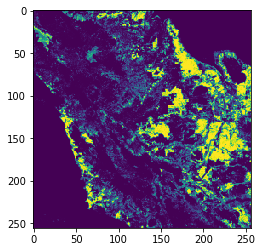

BAND 1 (G): max=255, min=0


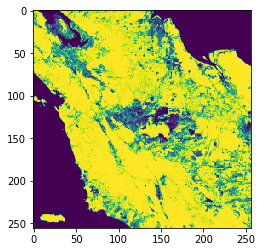

BAND 2 (B): max=13, min=0


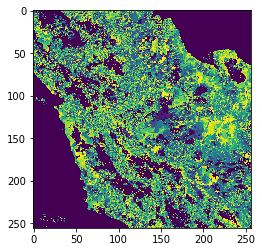

BAND 3 (α): max=255, min=255


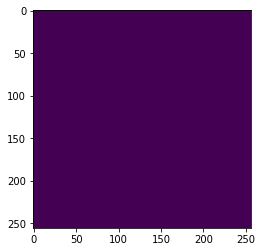

In [13]:
bands = {0:'R', 1:'G',2:'B',3:'α'}
for band in range(0,4):
    print(f"BAND {band} ({bands[band]}): max={im_arrays[:,:,band].max()}, min={im_arrays[:,:,band].min()}")
    plt.imshow(im_arrays[:,:,band])
    plt.show()


From these two examples, we find that Band 0 (R) is Loss, Band 1 (G) is Tree Cover, and Band 3 (B) is year of loss.

### Loss

Values from 0 - 255 converted into loss intensity (the downsampled loss). Held in Band 0 (R band)

### Tree cover

Percentage values scaled from 0 - 255. Front end converts this back into tree cover %. Held in Band 1 (G band)

### Year of loss

Integer year from 01 to 13. Held in Band 2 (B band).

To produce a nice visulisation on the website, the front end code needs to convert these values into a final image.

Note that the tree canopy threshold is set in the URL.